In [1]:
import io
import pandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("casas.csv")
df.head()

,tamanho,ano,garagem,preco
0,159.0,2003,2,208500
1,117.0,1976,2,181500
2,166.0,2001,2,223500
3,160.0,1915,3,140000
4,204.0,2000,3,250000


In [8]:
colunas = ["tamanho", "preco"]
df = df[colunas]
df.head()

,tamanho,preco
0,159.0,208500
1,117.0,181500
2,166.0,223500
3,160.0,140000
4,204.0,250000


In [9]:
X = df.drop("preco", axis = 1)
y = df["preco"]

In [10]:
X

,tamanho
0,159.0
1,117.0
2,166.0
3,160.0
4,204.0
...,...
1455,153.0
1456,193.0
1457,217.0
1458,100.0


In [11]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: preco, Length: 1460, dtype: int64

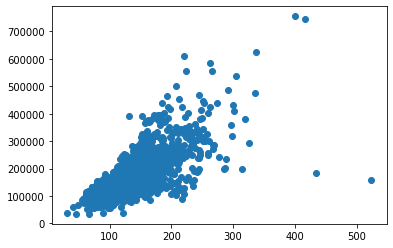

In [28]:
plt.scatter(X, y)

### Treino e teste

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
print(X_train.head())


tamanho
135     156.0
1452    100.0
762     144.0
932     177.0
435     154.0


In [25]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.predict(X_train)

array([196428.08984536, 135682.046307  , 183411.08051571, ...,
       113987.03075759, 170394.07118607, 183411.08051571])

In [26]:
modelo.intercept_

27206.968559934932

In [27]:
modelo.coef_

array([1084.75077747])

In [31]:
#Valor da casa previsão

print("Valor da casa:", modelo.predict([[120]]))

Valor da casa: [157377.06185642]


In [32]:
from flask import Flask

In [33]:
app = Flask("__name__")
print(app)

@app.route("/")
def home():
    return "API Regressão linear"

@app.route("/cotacao/<int:tamanho>")
def cotacao(tamanho):
    preco = modelo.predict([[tamanho]])
    return str (preco)

app.run(debug = True)

NameError: name 'app' is not defined